In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plot

In [2]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer() # Cargar el dataset

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [17]:
data.data.shape

(569, 30)

In [7]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
X, Y = data.data, data.target #Obtener los inputs y el target

In [10]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

In [27]:
N, D = X_train.shape 

In [28]:
N, D

(381, 30)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [35]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.79047118, -0.20718945, -0.8153586 , ..., -0.78581427,
        -0.27628944, -1.08994644],
       [ 1.3012021 ,  0.59838244,  1.275036  , ...,  0.83279405,
         0.15699193, -0.09307418],
       [-0.42757158,  0.71281027, -0.46543931, ..., -0.35765735,
        -0.13186232, -0.22784563],
       ...,
       [-0.89048288, -1.43614429, -0.91527631, ..., -0.94527853,
        -0.08317902, -0.93444091],
       [ 1.1383259 ,  0.1429597 ,  1.10505151, ...,  1.17691731,
         0.24786743, -0.06360997],
       [-0.67617209, -1.07684092, -0.61510858, ..., -0.86293475,
        -0.29738554,  1.0232918 ]], shape=(381, 30))

In [43]:
model = nn.Sequential(
    nn.Linear(D,1),
    nn.Sigmoid()
)

In [51]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [45]:
X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

AttributeError: 'Tensor' object has no attribute 'astype'

In [49]:
n_epochs = 1000
seed = 42

# Set seed for PyTorch
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [50]:
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)



In [52]:
for it in range(n_epochs):
    optimizer.zero_grad()
    
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    loss.backward()
    optimizer.step()

    outputs_test = model(X_test) 
    loss_test =  criterion(outputs_test, y_test)

    train_losses[it] = loss.item()
    test_losses[it] = loss_test.item()

    if it % 50 == 0:
        print(f"Epoch: {it}/{n_epochs}, Train loss: {loss.item():.4f}, Test loss {loss_test.item():.4f}")

Epoch: 0/1000, Train loss: 0.4277, Test loss 0.4228
Epoch: 50/1000, Train loss: 0.2969, Test loss 0.2974
Epoch: 100/1000, Train loss: 0.2316, Test loss 0.2368
Epoch: 150/1000, Train loss: 0.1922, Test loss 0.2010
Epoch: 200/1000, Train loss: 0.1661, Test loss 0.1776
Epoch: 250/1000, Train loss: 0.1477, Test loss 0.1614
Epoch: 300/1000, Train loss: 0.1340, Test loss 0.1497
Epoch: 350/1000, Train loss: 0.1233, Test loss 0.1409
Epoch: 400/1000, Train loss: 0.1146, Test loss 0.1341
Epoch: 450/1000, Train loss: 0.1075, Test loss 0.1287
Epoch: 500/1000, Train loss: 0.1016, Test loss 0.1244
Epoch: 550/1000, Train loss: 0.0964, Test loss 0.1208
Epoch: 600/1000, Train loss: 0.0920, Test loss 0.1179
Epoch: 650/1000, Train loss: 0.0881, Test loss 0.1154
Epoch: 700/1000, Train loss: 0.0846, Test loss 0.1134
Epoch: 750/1000, Train loss: 0.0815, Test loss 0.1116
Epoch: 800/1000, Train loss: 0.0788, Test loss 0.1101
Epoch: 850/1000, Train loss: 0.0762, Test loss 0.1089
Epoch: 900/1000, Train loss: 0.

[]

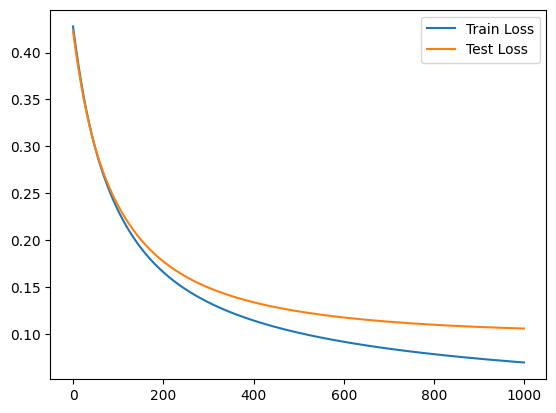

In [53]:
plot.plot(train_losses, label='Train Loss')
plot.plot(test_losses, label='Test Loss')
plot.legend()
plot.plot()

In [54]:
with torch.no_grad():
    p_train = model(X_train)
    p_train = np.round(p_train.numpy())
    train_acc = np.mean(y_train.numpy() == p_train)

    p_test = model(X_test)
    p_test = np.round(p_test.numpy())
    test_acc = np.mean(y_test.numpy() == p_test)

print(f"Train acc: {train_acc: .4f}, Test acc: {test_acc:.4f}")

    

Train acc:  0.9895, Test acc: 0.9681


In [55]:
torch.save(model.state_dict(), 'linear_classifier.pt')

In [ ]:
prod_model = nn.Sequential(
    nn.Linear(D,1),
    nn.Sigmoid()
)

prod_model.load_state_dict(torch.load('linear_classifier.pt'))

<All keys matched successfully>